In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


path = "housing.csv"
df = pd.read_csv(path,sep = ',')

df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [2]:
df.info() #Видим что пропущенные значение есть ТОЛЬКО у признака total_bedrooms

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
print(df.duplicated().sum())


0


In [4]:
# Проведите преобразование категориального признака ocean_proximity через OneHot или Dummy-кодировку

#one_hot encoding
one_hot = pd.get_dummies(df['ocean_proximity'])
df = df.drop('ocean_proximity',axis = 1)
df = df.join(one_hot)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   <1H OCEAN           20640 non-null  uint8  
 10  INLAND              20640 non-null  uint8  
 11  ISLAND              20640 non-null  uint8  
 12  NEAR BAY            20640 non-null  uint8  
 13  NEAR OCEAN          20640 non-null  uint8  
dtypes: float64(9), uint8(5)
memory usage: 1.5 MB


In [6]:
#Замените признаки total_rooms и total_bedrooms на average_rooms и average_bedrooms (поделив на households).

def avg_bedrooms(row):
    row['total_bedrooms']= row['total_bedrooms']/row['households']
    return row

df = df.apply(avg_bedrooms,axis=1)

def avg_rooms(row):
    row['total_rooms']= row['total_rooms']/row['households']
    return row

df = df.apply(avg_rooms,axis=1)


df = df.rename({'total_bedrooms': 'average_bedrooms', 'total_rooms': 'average_rooms'}, axis=1) 
df

,longitude,latitude,housing_median_age,average_rooms,average_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.984127,1.023810,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,6.238137,0.971880,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,8.288136,1.073446,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,5.817352,1.073059,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,6.281853,1.081081,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,5.045455,1.133333,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,6.114035,1.315789,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,5.205543,1.120092,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,5.329513,1.171920,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


In [7]:
# Разбейте датасет на тренировочную, валидационную и тестовую выборку


from sklearn.model_selection import train_test_split

df_train_val, df_test = train_test_split(df, test_size=0.1)
df_test.shape

(2064, 14)

In [8]:
df_train, df_val = train_test_split(df_train_val, test_size = 0.33)
print(df_train.shape)
print(df_val.shape)

(12445, 14)
(6131, 14)


In [9]:
test_size = (df_test.shape[0]/df.shape[0]) #Размер выборок в процентах
print(test_size)
val_size = (df_val.shape[0]/df.shape[0])
print(val_size)
train_size = (df_train.shape[0]/df.shape[0])
print(train_size)

0.1
0.29704457364341086
0.6029554263565892


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   average_rooms       20640 non-null  float64
 4   average_bedrooms    20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   <1H OCEAN           20640 non-null  float64
 10  INLAND              20640 non-null  float64
 11  ISLAND              20640 non-null  float64
 12  NEAR BAY            20640 non-null  float64
 13  NEAR OCEAN          20640 non-null  float64
dtypes: float64(14)
memory usage: 2.2 MB


In [11]:
df['average_bedrooms'].isnull().sum() #Число экземпляров данных, для которых признак average_bedrooms отсутствует.

207

In [12]:
df_test.info()
df_val.info()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 3868 to 2912
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           2064 non-null   float64
 1   latitude            2064 non-null   float64
 2   housing_median_age  2064 non-null   float64
 3   average_rooms       2064 non-null   float64
 4   average_bedrooms    2035 non-null   float64
 5   population          2064 non-null   float64
 6   households          2064 non-null   float64
 7   median_income       2064 non-null   float64
 8   median_house_value  2064 non-null   float64
 9   <1H OCEAN           2064 non-null   float64
 10  INLAND              2064 non-null   float64
 11  ISLAND              2064 non-null   float64
 12  NEAR BAY            2064 non-null   float64
 13  NEAR OCEAN          2064 non-null   float64
dtypes: float64(14)
memory usage: 241.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6131 entries,

In [13]:
print(df_test['average_bedrooms'].isnull().sum()) #Пропущенных в тестовой
print(df_val['average_bedrooms'].isnull().sum()) #Пропущенных в валидационной
print(df_train['average_bedrooms'].isnull().sum()) #Пропущенных в обучающей

29
54
124


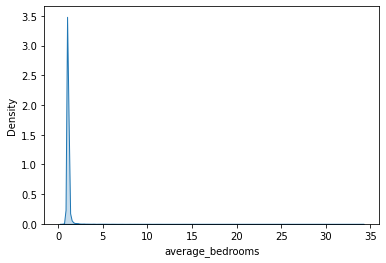

In [14]:
import seaborn as sns

snsplot = sns.kdeplot(df['average_bedrooms'], shade=True)
fig = snsplot.get_figure()

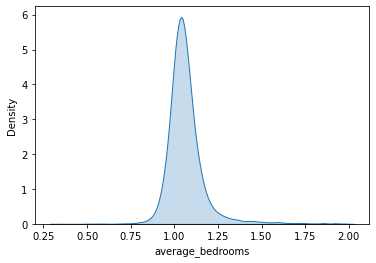

In [15]:
# В признаке average_bedrooms (total_bedrooms) есть отсутствующие значения.
# Определите число экземпляров данных, для которых этот признак отсутствует.
# Придумайте и обоснуйте стратегию заполнения пропусков в этой задаче. Заполните пропуски.

df2 = df.copy()
cols = ['average_bedrooms']
df2[cols] = df2[df2[cols] < 2][cols]
df2.dropna()

snsplot = sns.kdeplot(df2['average_bedrooms'], shade=True)
fig = snsplot.get_figure()


#По графику буду считать распределение за нормальное при генерации (хотя оно не совсем таково)

In [16]:
def metric(df, column):
    mn = df[column].mean()
    st = df[column].std()
    return [mn,st]
    
def row_correct(row, mn,st, column):
    if row.isnull().sum()!=0:
        row[column] = np.random.normal(mn,st)
    return row

def fill_gaps(df, column):
    mn, st = metric(df, column)
    df = df.apply(lambda x: row_correct(x,mn,st, column), axis=1)
    return df
    
column = 'average_bedrooms'
    
df_val = fill_gaps(df_val, column)
df_train = fill_gaps(df_train, column)
df_test = fill_gaps(df_test, column)


In [17]:
print(df_test['average_bedrooms'].isnull().sum()) #Пропущенных в тестовой
print(df_val['average_bedrooms'].isnull().sum()) #Пропущенных в валидационной
print(df_train['average_bedrooms'].isnull().sum()) #Пропущенных в обучающей

0
0
0


In [18]:
# Нормализуйте признаки longitude и latitude (сделайте так, чтобы каждый признак имел среднее значение
# 0 и дисперсию 1 внутри обучающей выборки)


from sklearn import preprocessing

def row_normalize(row, mn, st, column):#z преобразование
    row[column] = (row[column]-mn)/st
    return row

def df_normalize(df, columns):    
    for column in columns:
        mn,st = metric(df, column)
        df = df.apply(lambda x: row_normalize(x,mn,st, column), axis=1)
    return df
    
df_test = df_normalize(df_test,['longitude', 'latitude'])
df_val = df_normalize(df_val,['longitude', 'latitude'])
df_train = df_normalize(df_train,['longitude', 'latitude'])

In [19]:
def print_mn_st(df, cols):
    for c in cols:
        print('Среднее ', c, ':',  df[c].mean())
        print('Дисперсия ', c, ':',df[c].std())
        
cols = ['longitude', 'latitude']

print_mn_st(df_test, cols)
print_mn_st(df_val, cols)
print_mn_st(df_train, cols)

Среднее  longitude : -1.2797396647988579e-13
Дисперсия  longitude : 1.0000000000000004
Среднее  latitude : -6.591929037508658e-15
Дисперсия  latitude : 0.9999999999999987
Среднее  longitude : -4.931012737621561e-15
Дисперсия  longitude : 0.9999999999999971
Среднее  latitude : -1.8402394814859237e-14
Дисперсия  latitude : 0.999999999999986
Среднее  longitude : -6.45049301237283e-14
Дисперсия  longitude : 0.9999999999999951
Среднее  latitude : 2.5800530409951107e-16
Дисперсия  latitude : 1.000000000000013
